In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [2]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')


In [3]:
#merging the datasets

df = pd.concat([mat,por])
df.head(5)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
#information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [5]:
#shape of the dataset rows,columns

print(df.shape)
print(df.size)

(1044, 33)
34452


In [6]:
print(len(mat))
print(len(por))
print(len(df))

395
649
1044


In [7]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [8]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'average' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,average
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,average


In [9]:
#Analysing the variables

#checking for missing variables
df.isnull().any()

#It is found that there are no missing variables in the dataset

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

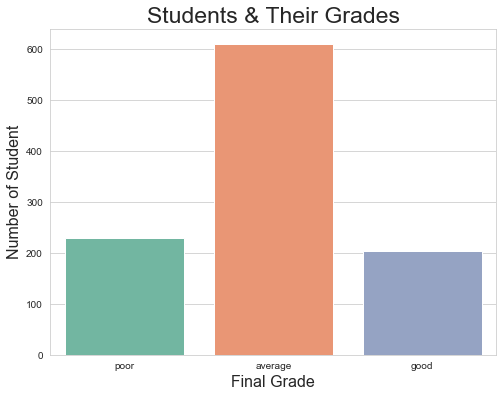

In [10]:
#Exploratory data analysis on the student dataset 
#EDA will help us reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set 
#variables and the relationships between them. 

#Final Grade Distribution

# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","average","good"], palette='Set2')
plt.title('Students & Their Grades',fontsize=23)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

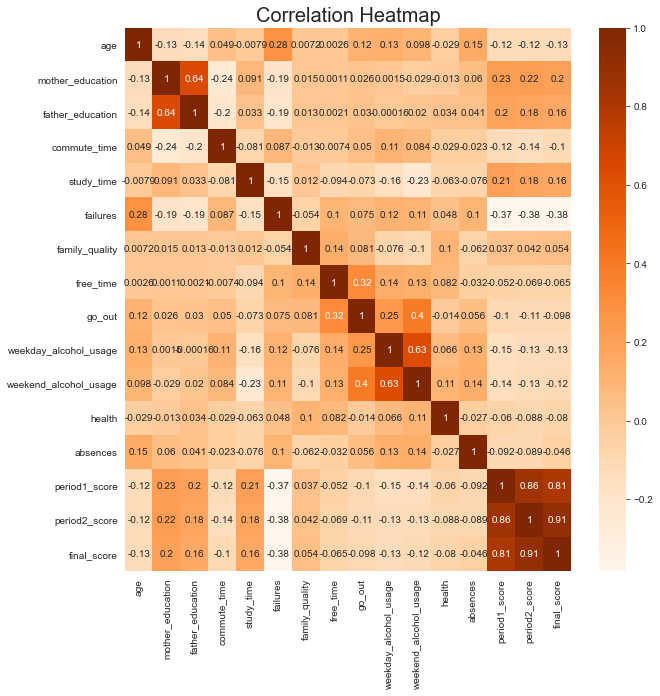

In [11]:
#Corelation heatmap 

#we can use a correlation heatmap to see correlation between variables
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Oranges")
plt.title('Correlation Heatmap', fontsize=20)

In [12]:
#Applying hypothesis testing for different parameters and factors
#checking its relationship with students grades

# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','average','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

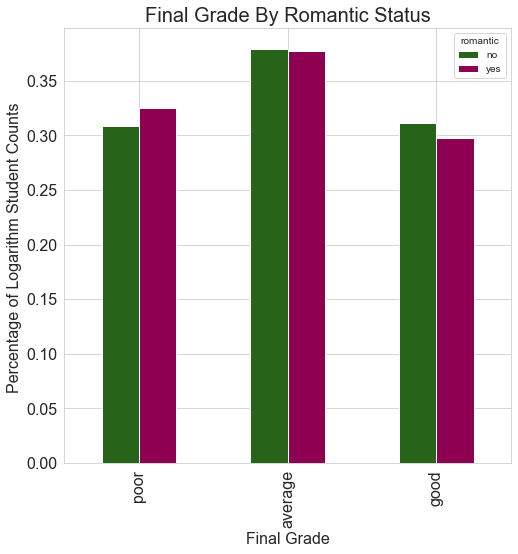

In [13]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show() 

In [14]:
# chi-square test result -- significant!
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.038810128743959726

In [15]:
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

<ipython-input-16-770df3aee3b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_alcohol_usage']=good.weekend_alcohol_usage
<ipython-input-16-770df3aee3b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_alcohol_usage']=poor.weekend_alcohol_usage


Text(0.5, 0, 'Level of Alcohol Consumption')

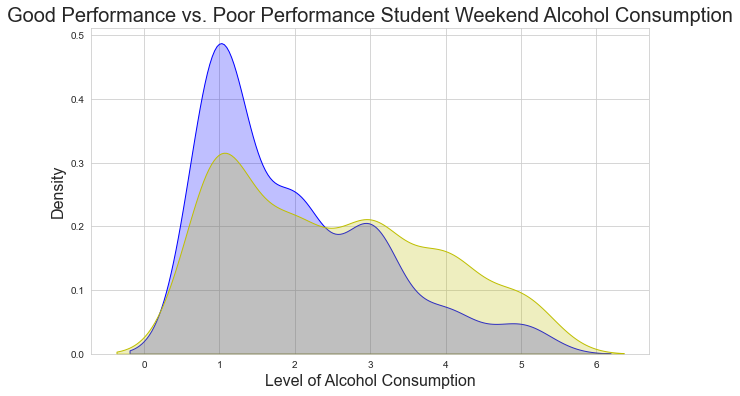

In [16]:
# create good student dataframe
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
# create poor student dataframe
poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="b")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="y")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0.5, 0, 'Final Grade')

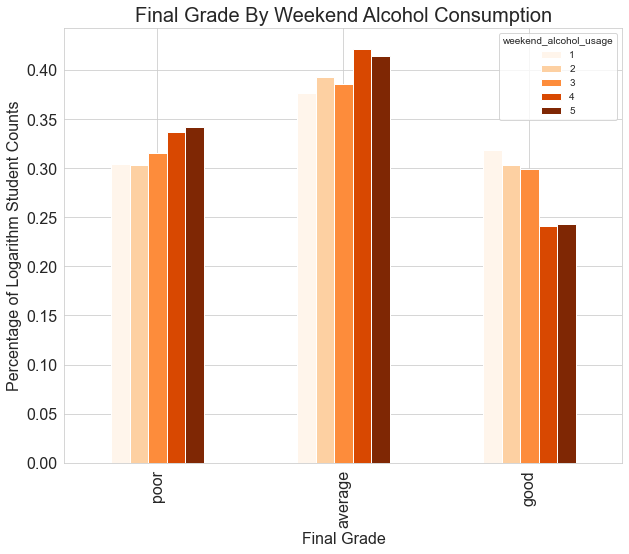

In [17]:
alc_perc.plot.bar(colormap="Oranges", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [18]:
# chi-square test result -- significant!
import statsmodels.api as sm
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.007592294056368298

In [19]:
#parents education

good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education

<ipython-input-19-20227a5a04d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_student_father_education'] = good.father_education
<ipython-input-19-20227a5a04d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_student_father_education'] = poor.father_education
<ipython-input-19-20227a5a04d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Text(0.5, 0, 'Education Level of Father')

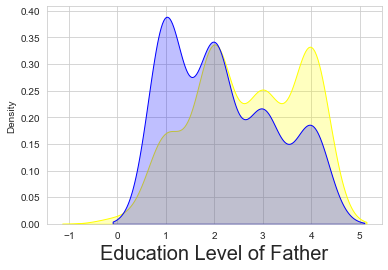

In [20]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="yellow")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Education Level of Father', fontsize=20)

Text(0.5, 0, 'Education Level of Mother')

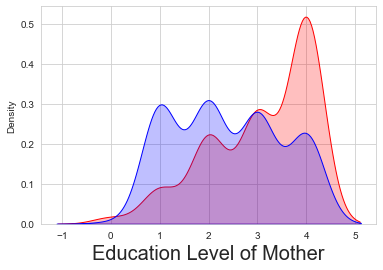

In [21]:
# see the difference between good and poor performers' mother education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Education Level of Mother', fontsize=20)

In [22]:
# OLS tells that parents' education level has a positive correlation with students' final score.
#Comparatively, mother's education level has bigger influence than father's education level!

# use OLS to see coefficients
X_edu = df[['mother_education','father_education']]
y_edu = df.final_score
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            final_score   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              2287.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        13:14:43   Log-Likelihood:                         -3194.8
No. Observations:                1044   AIC:                                      6394.
Df Residuals:                    1042   BIC:                                      6403.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.4078      0.166     14.527      0.000       2.083       2.733
father_education     1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Frequency of Going Out')

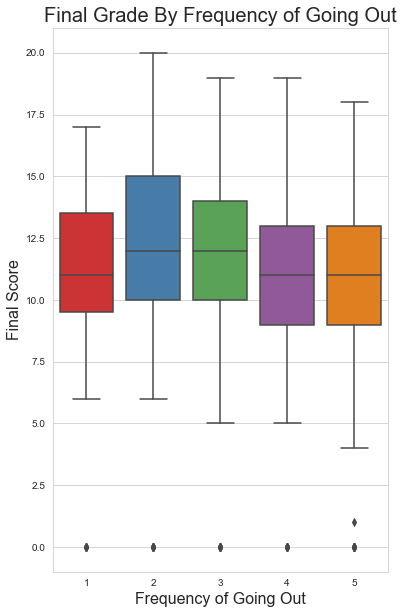

In [23]:
#Final Grade By Frequency Of Going Out
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=df, palette='Set1')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

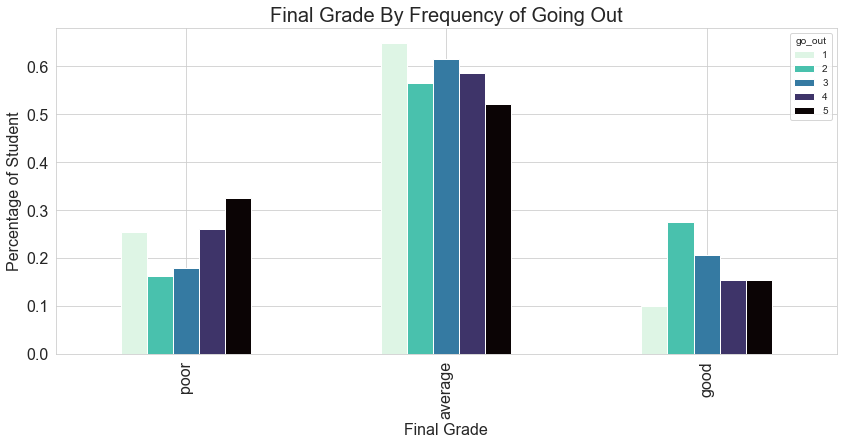

In [24]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [25]:
# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

4.365198328282194e-05

Text(0.5, 0, 'Age')

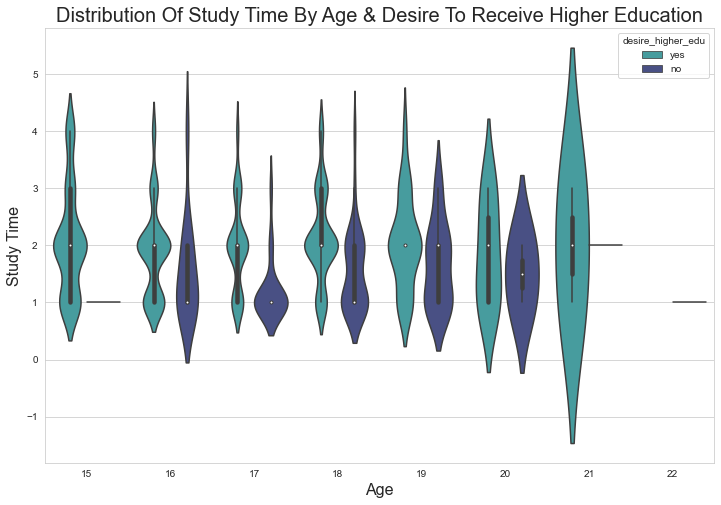

In [26]:
#Final Grade By Desire To Go To College

# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="mako_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [27]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

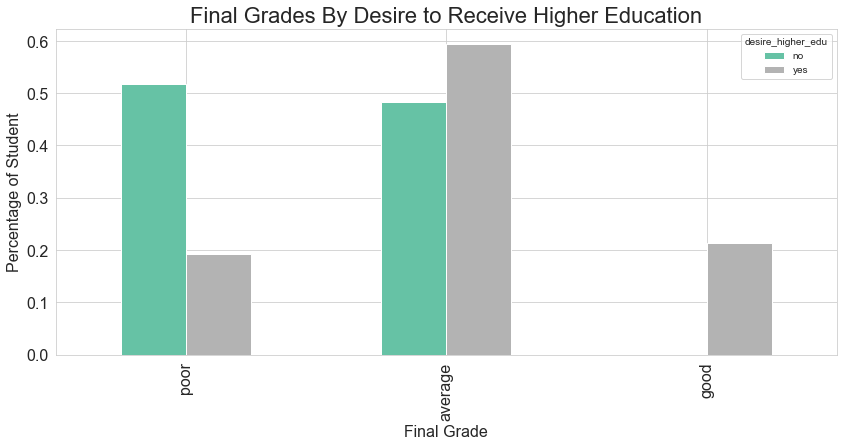

In [28]:
higher_perc.plot.bar(colormap="Set2", figsize=(14,6), fontsize=16)
plt.title('Final Grades By Desire to Receive Higher Education', fontsize=22)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [29]:
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

2.2470914018413168e-13

In [30]:
#Final Grade By Living Area

# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


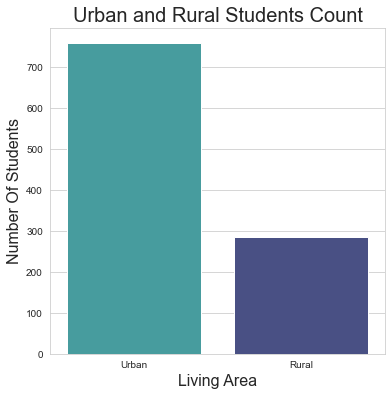

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(df.address, palette='mako_r')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [32]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

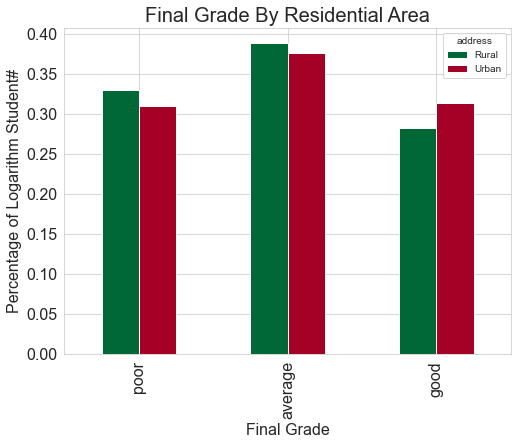

In [33]:
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Residential Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [34]:
# chi-square test result -- significant!
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

0.007608910517873602

In [35]:
# explore other variables via OLS
dfl = df.copy()
X_ols = dfl.drop(['period1_score', 'period2_score', 'final_score','final_grade', 'failures','study_time','absences'], axis=1)
X_ols = pd.get_dummies(X_ols)

In [36]:
mod = sm.OLS(df.final_score, X_ols)
mod = mod.fit()

# Data Model Preparation


In [37]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

# dataset train_test_split
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# see total number of features
len(list(X_train))

58

# Decision Tree Classifier


In [38]:
# find the optimal number of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decision Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))



Decision Tree Model Score : 0.9 , Cross Validation Score : 0.8598726114649682


# Random Forest Classifier

In [39]:
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Random Forest Model Score : 0.9726027397260274 , Cross Validation Score : 0.8630573248407644


# Support Vector Classification

In [40]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.8849315068493151 , Cross Validation Score : 0.8694267515923567


# Logistic Regression

7    0.89172
8    0.89172
dtype: float64

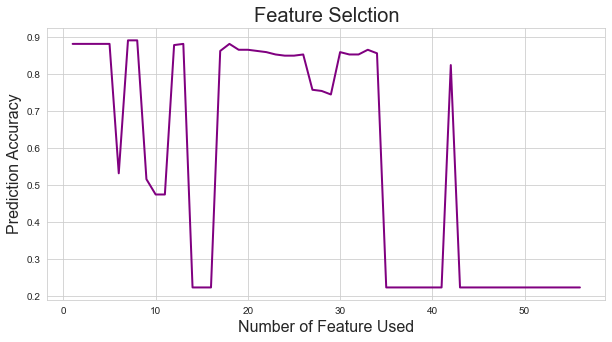

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))
ks

plt.figure(figsize=(10,5))
ks.plot.line(linewidth=2, color="purple")
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

ks.where(ks==ks.max()).dropna()


In [42]:
# final model
sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.8972602739726028 , Cross Validation Score : 0.89171974522293


# Thus We Can See That Logistic Regression Is The Best Choice
